# 2018年9月全球科技前沿报告
------

数据部 康宸

2018.10.25

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
from wordcloud import WordCloud
import jieba
import jieba.analyse
import sys

jieba.analyse.set_idf_path("./dicts/idf.txt")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
sep_d = pd.read_csv('./1809/sep_all.csv',sep='|',header=0)
sep_d.head()

,title,content,field,source,date,content_clean
0,欧盟委员会决定不再延长对华太阳能板双反措施,据北极星太阳能光伏网9月3日消息，欧盟决定不再延长于9月3日到期的对华太阳能板反倾销和反补贴...,能源,北极星太阳能光伏网,9月3日,欧盟决定不再延长于9月3日到期的对华太阳能板反倾销和反补贴措施。欧委会表示，上述决定是在考虑...
1,德国将设新机构助推颠覆性创新,据中国储能网9月3日消息，德国政府内阁通过决议，将设立一个新机构，对颠覆性创新进行为期10年...,能源,中国储能网,9月3日,德国政府内阁通过决议，将设立一个新机构，对颠覆性创新进行为期10年、高达10亿欧元的资助。据...
2,俄罗斯在地中海举行大规模军演,据环球网9月2日消息，俄罗斯海军与空天军将于9月1日至8日在地中海举行大规模军演。俄国防部表...,海洋,环球网,9月2日,俄罗斯海军与空天军将于9月1日至8日在地中海举行大规模军演。俄国防部表示，此次演习将有来自俄...
3,美海军授予洛马公司1350万美元合同，以进一步推进潜艇战联合战术系统计划,据战略前沿技术9月3日消息，美海军海上系统司令部（NAVSEA）近日宣布向洛克希德·马丁公司...,海洋,战略前沿技术,9月3日,美海军海上系统司令部（NAVSEA）近日宣布向洛克希德·马丁公司授予一份价值1350万美元的...
4,日本将成立太空和网络空间委员会，强化网络和太空能力,据翔智科技信息网9月3日消息，近日日本防卫省长官小野寺宣布，日本防卫省将成立太空和网络空间委...,航天,翔智科技信息网,9月3日,近日日本防卫省长官小野寺宣布，日本防卫省将成立太空和网络空间委员会，探讨在太空和网络空间领域...


In [3]:
sep_d.describe()

,title,content,field,source,date,content_clean
count,320,320,320,320,320,320
unique,320,320,9,124,28,320
top,亚马逊等互联网公司支持美国政府制定现代化的数据隐私法,据国防科技要闻9月7日消息，美海军近日发布一份名为《海军水面技术创新其他交易授权协议》的信息...,能源,国防科技信息网,9月17日,美国梅奥诊所科学家通过老鼠实验发现，清除大脑中衰老细胞可改善神经退行性疾病症状，缓解认知衰退...
freq,1,1,60,29,22,1


In [11]:
'''
这块是用来提取国家的代码
'''
import jieba
from functools import reduce
import getnation
import getnation.need_list as need_list
import getnation.get
# nation_list = need_list.nation_list
# us_kw = need_list.us_kw
# ru_kw = need_list.ru_kw
# uk_kw = need_list.uk_kw
# ge_kw = need_list.ge_kw
# cn_kw = need_list.cn_kw
# jp_kw = need_list.jp_kw
# kr_kw = need_list.kr_kw
# us_pattern = need_list.us_pattern 
# cn_pattern = need_list.cn_pattern 
# eu_pattern = need_list.eu_pattern 
# uk_pattern = need_list.uk_pattern 
# fr_pattern = need_list.fr_pattern 
# ge_pattern = need_list.ge_pattern 
# ca_pattern = need_list.ca_pattern 
# au_pattern = need_list.au_pattern 
# jp_pattern = need_list.jp_pattern 
# kr_pattern = need_list.kr_pattern 
# ru_pattern = need_list.ru_pattern 
# id_pattern = need_list.id_pattern 
# is_pattern = need_list.is_pattern 
# in_pattern = need_list.in_pattern

In [12]:
area = []
area = list(map(getnation.get.foo, sep_d['content_clean']))
area_str = []
for i in area:
    area_str.append(str(i).replace('[','').replace(']','').replace('\'','').replace('，',','))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/m7/7lm92hx92zb89939mng3l23c0000gn/T/jieba.cache
Loading model cost 0.889 seconds.
Prefix dict has been built succesfully.


['迪拜', '日前', '推出', '了', '一项', '全球', '全球性', '3D', '打印', '战略', '计划', '，', '要', '在', '2025', '年前', '实现', '25%', '的', '新', '建筑', '全部', '采用', '3D', '打印', '技术', '制造', '，', '以', '有效']
请根据关键词输入国别: 
沙特
['世界', '卫生', '组织', '世界卫生组织', '发出', '警告', '称', '，', '全球', '各国', '麻疹', '感染', '人数', '急剧', '上升', '。', '目前', '，', '越南', '河内', '出现', '300', '例', '麻疹', '病例', '，', '比', '去年', '增加', '400']
请根据关键词输入国别: 
国际
['耶鲁', '大学', '耶鲁大学', '研究', '人员', '成功', '实现', '量子', '门', '在', '两个', '量子', '比特', '之间', '的', '远距', '传送', '，', '向', '构建', '模块', '模块化', '量子', '计算', '算机', '计算机', '架构', '迈出', '关键', '一步']
请根据关键词输入国别: 
美国
['由', 'CRISPR', '“', '先驱', '”', 'EmmanuelleCharpentier', '创办', '的', 'CRISPRTherapeutics', '公司', '与', 'Vertex', '公司', '联合', '宣布', '，', '将', '在', '德国', '启动', 'β', '-', '地中', '中海', '地中海', '贫血', '体外', '基因', '编辑', '疗法']
请根据关键词输入国别: 
瑞士
['美印', '近日', '签署', '了', '《', '通信', '兼容', '容性', '兼容性', '与', '安全', '协议', '》', '，', '为', '美国', '向', '印度', '出口', '武装', '无人', '人机', '无人机', '以及', '其他', '武器', '装备', '武器装备', '铺平', '了']
请根据关键词输

In [13]:
sep_d['area'] = area_str

In [16]:
sep_d.to_csv('./sep_all_nat.csv', sep='|', index=False)

In [93]:
field_stat = pd.DataFrame(sep_d['field'].value_counts())
field_stat

,field
能源,60
信息,56
生物,47
科技战略,32
海洋,31
新材料,24
航空,24
先进制造,23
航天,23


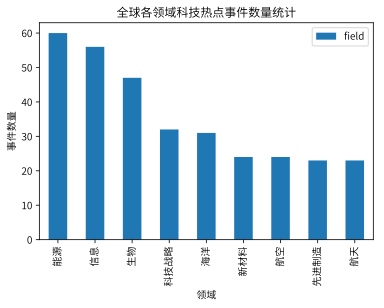

In [75]:
plt.rcParams['font.family'] = ['Source Han Sans CN']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
field_stat.plot(kind = 'bar')
plt.xlabel('领域')
plt.ylabel('事件数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

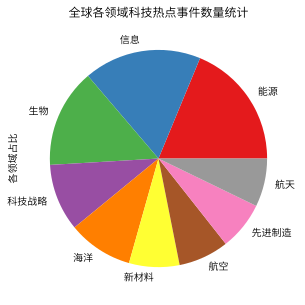

In [76]:
field_stat['proportion'] = field_stat['field'].map(lambda x: x/320)
field_stat
field_stat.plot(y='proportion',kind = 'pie',legend=False,figsize=(5,5),colormap='Set1')
plt.ylabel('各领域占比')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

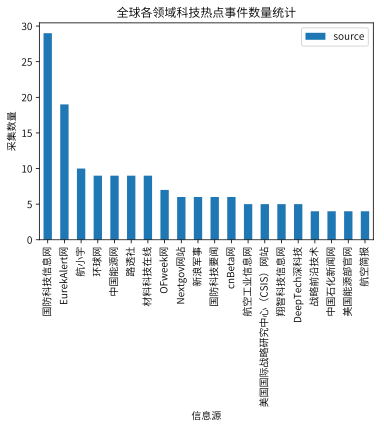

In [77]:
source_stat = pd.DataFrame(sep_d['source'].value_counts())
source_stat[0:20].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

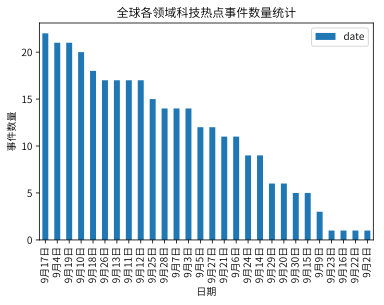

In [78]:
date_stat = pd.DataFrame(sep_d['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('事件数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

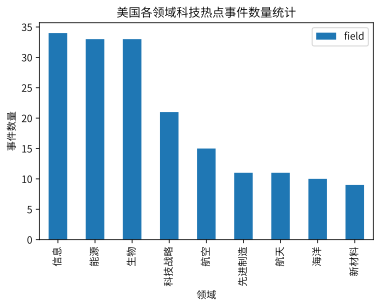

In [88]:
sep_us = sep_d[sep_d['area'].str.contains(us_pattern)]
sep_us_field = pd.DataFrame(sep_us['field'].value_counts())
sep_us_field.plot(kind = 'bar')
plt.xlabel('领域')
plt.ylabel('事件数量')
plt.title('美国各领域科技热点事件数量统计')
plt.show()

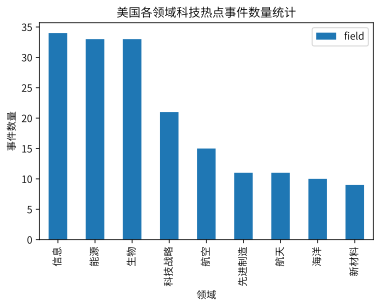

In [18]:
from pyecharts import Geo,Style,Map,Page,configure
import echarts_cities_pypkg,echarts_countries_pypkg
echarts_cities_pypkg.Pypkg

echarts_cities_pypkg.Pypkg

In [22]:
data1 = [
    ("United States", 1),("china", 12),("Germany", 12),("Japan", 12),("Australia", 14),("Korea", 15),
    ("Russia", 16)]
style = Style(
        title_color="#fff",
        title_pos="center",
        width=1600,
        height=900,
        background_color='#404a59'
    )
chart = Map("全球科技领域活跃度", "data from 全球技术地图", **style.init_style)
attr, value = chart.cast(data1)
chart.add("", attr, value, maptype="world", type="heatmap", is_visualmap=True,
              visual_range=[0, 16], visual_text_color='#fff',
              is_legend_show=False, is_map_symbol_show=False)
chart